Importing The Dependencies

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading The MNIST Data From Keras Dataset

In [45]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [46]:
type(X_train)

numpy.ndarray

In [47]:
# Shape
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Training Data = 60,000 Images ,
Testing Data = 10,000 Images ,
Image Dimension = 28 X 28 ,
Color Channel = 1 ,

In [48]:
# Printing The 10th Image
print(X_train[9].shape)

(28, 28)


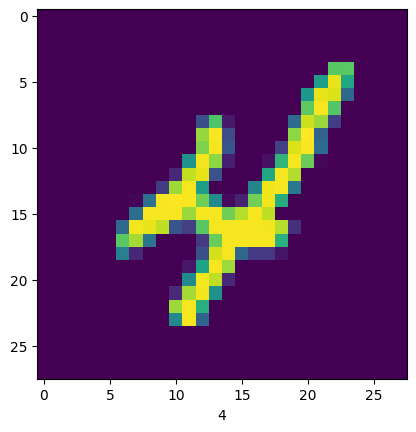

In [49]:
# Displaying The Image

plt.imshow(X_train[9])
plt.xlabel(Y_train[9])
plt.show()

Image Labels

In [50]:
# Unique Values In Y_train
print(np.unique(Y_train))

# Unique Values In Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We Can Use These Labels As Such Or We Can Also Apply One Hot Encoding

All The Images Have The Same Dimensions In This Dataset, If Not, We Will Need To Convert Them In Same Dimension As The Majority One's

In [51]:
# Scaling The Values

X_train = X_train/255
X_test = X_test/255

Building The NN

In [52]:
# Setting Up The Layers Of The NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [53]:
# Compiling The NN

model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [54]:
# Training The NN
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4064 - accuracy: 0.8944
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1650 - accuracy: 0.9518
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1178 - accuracy: 0.9649
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0934 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0764 - accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0471 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0411 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.035

Training Data Accuracy Is 98.83%

**Accuracy On Test Data**

In [55]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 770us/step - loss: 0.0870 - accuracy: 0.9731


Testing Data Accuracy Is 97.31%

In [56]:
print(X_test.shape)

(10000, 28, 28)


Text(0.5, 0, '7')

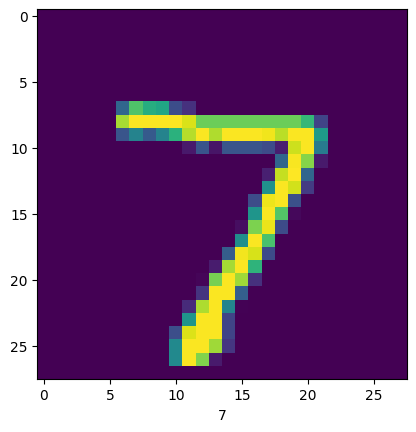

In [57]:
# First Data Point In X_test

plt.imshow(X_test[0])
plt.xlabel(Y_test[0])

In [58]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 916us/step


In [59]:
Y_pred[0]

# Probablity Of Each Class For That Data Point

array([6.8935310e-03, 5.8166590e-02, 2.0045750e-01, 6.6107005e-01,
       2.1222371e-03, 2.2604292e-02, 3.5614485e-05, 9.9988663e-01,
       3.9134682e-03, 3.5731360e-02], dtype=float32)

In [60]:
# Converting The Prediction Probabilities To Class Label

label_for_first_test = np.argmax(Y_pred[0])
label_for_first_test

7

In [61]:
# Converting The Prediction Probabilities To Class Label For All Test Data Points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_pred_labels


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 2,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


Confusion Matrix

In [62]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    2,    0,    3,    2,    1,    1,    0],
       [   0, 1126,    4,    0,    0,    1,    1,    0,    3,    0],
       [   1,    2, 1008,    3,    0,    0,    3,    7,    8,    0],
       [   1,    0,    4,  971,    0,   22,    0,    5,    4,    3],
       [   1,    0,    2,    0,  946,    0,    7,    4,    0,   22],
       [   2,    0,    0,    3,    1,  876,    2,    1,    4,    3],
       [   6,    2,    1,    1,    4,   13,  928,    0,    3,    0],
       [   2,    4,   11,    4,    0,    0,    0,  999,    1,    7],
       [   2,    4,    4,   10,    2,   12,    0,    5,  929,    6],
       [   5,    2,    0,    3,    6,    4,    0,    8,    2,  979]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

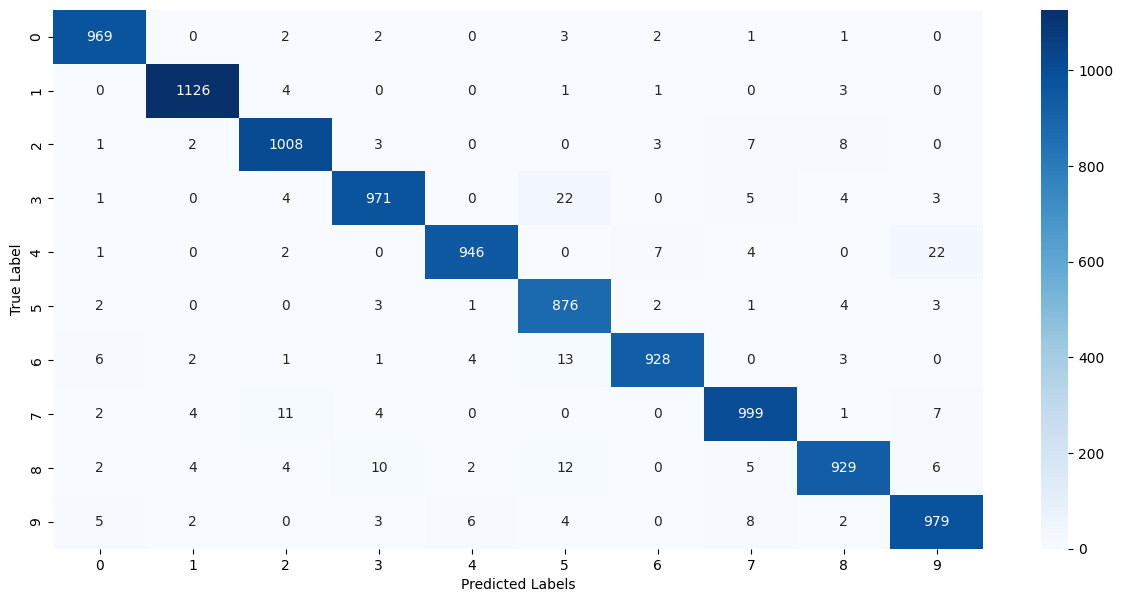

In [63]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Labels')

Building A Predictive System

In [64]:
input_image_path = './MNIST_digit.png'

input_image = cv2.imread(input_image_path)
input_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [65]:
type(input_image)

numpy.ndarray

In [66]:
cv2.imshow('Input Image', input_image)

In [67]:
input_image.shape

(318, 318, 3)

In [68]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [69]:
grayscale.shape

(318, 318)

In [70]:
input_image_resized = cv2.resize(grayscale, (28, 28))

In [71]:
input_image_resized.shape

(28, 28)

In [72]:
input_image_resized = input_image_resized/255


In [73]:
image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

In [74]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[2.2254873e-04 2.6899826e-02 2.5347194e-02 9.9990869e-01 9.7270749e-05
  1.4137614e-01 1.6762007e-05 6.4921685e-02 6.0663547e-02 1.3271819e-01]]


In [75]:
input_pred_label = np.argmax(input_prediction)
input_pred_label


3

Predictive System

In [78]:
input_image_path = input('Path Of Image To Be Predicted!')

input_image = cv2.imread(input_image_path)

cv2.imshow("Image To Be Predicted", input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale, (28, 28))

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit Is Recognized As ', input_pred_label)

1/1 [==============================] - 0s 30ms/step
The Handwritten Digit Is Recognized As  3
